# Import all the libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
import math
from pandas.plotting import scatter_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import SimpleImputer


%matplotlib inline

In [2]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Read the Dataset

In [3]:
df = pd.read_csv("/Users/bhavyakandhari/Downloads/data.csv", encoding="ISO-8859-1")

# Exploratory Data Analysis

## Basic Overview of the Data

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
# Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Number of rows and columns
rows, columns = df.shape
print("Number of rows:",rows)
print("Number of columns:",columns)

Number of rows: 541909
Number of columns: 8


# Data Distribution

In [7]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


## Analysis based on Stockcode

In [9]:
# Stockcode distribution
df['StockCode'].value_counts().head()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64

Text(0.5, 1.0, 'Top 5 stockcode')

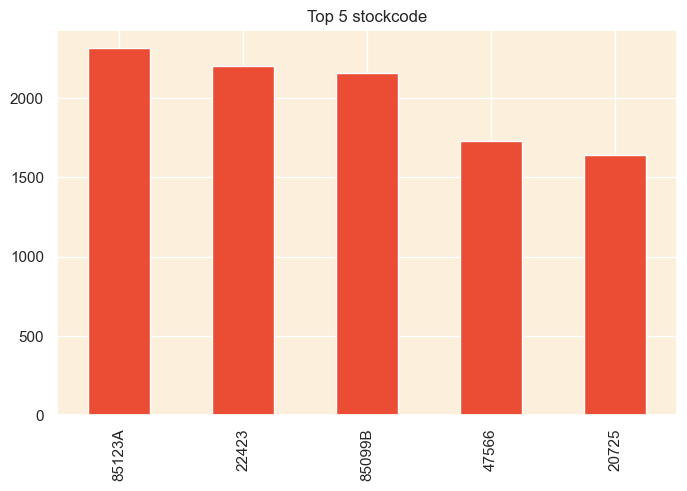

In [10]:
# Plot the top 5 stockcode
df['StockCode'].value_counts().head().plot.bar(figsize=(8,5) ,color='#eb4c34')
plt.title('Top 5 stockcode')

## Analysis Based on Country

In [11]:
# Check the number of countries
df['Country'].nunique()

38

In [12]:
# Display all the countries
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Text(0.5, 1.0, 'Top 5 countries')

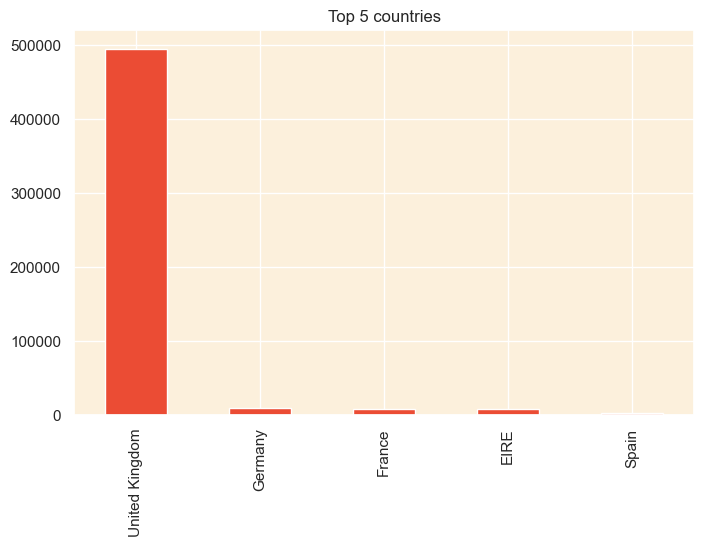

In [13]:
# Plot the top 5 countries
df['Country'].value_counts().head().plot.bar(figsize=(8,5) ,color='#eb4c34')
plt.title('Top 5 countries')

## Analysis based on Day

In [14]:
# Create new columns
df['TotalAmount']=df['Quantity']*df['UnitPrice']
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")
df['Day']=df['InvoiceDate'].dt.day_name()
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month"] = df["InvoiceDate"].apply(lambda x: x.month)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)

In [15]:
df['Day'].value_counts()

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: Day, dtype: int64

<Axes: title={'center': 'Orders per day of the week'}, xlabel='Day', ylabel='count'>

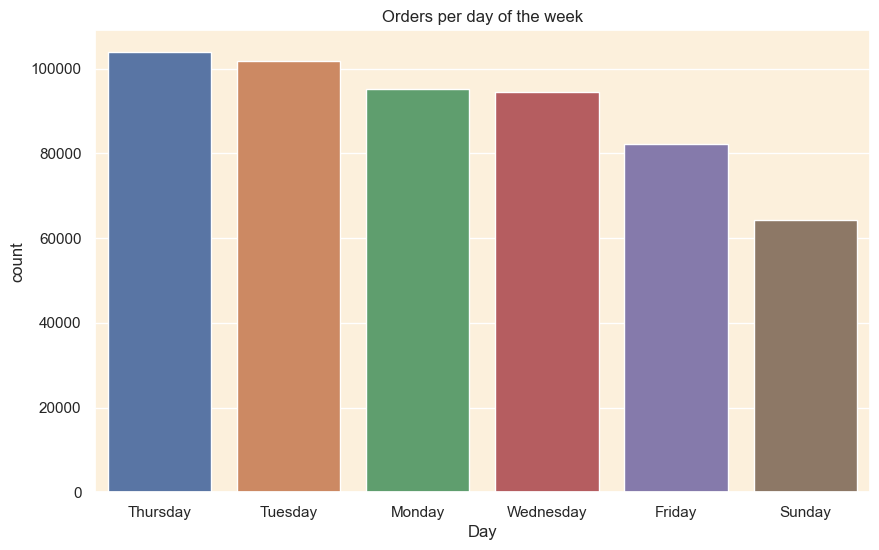

In [16]:
# Plot the number of orders per day of the week
plt.figure(figsize=(10,6))
plt.title('Orders per day of the week')
sns.countplot(x='Day' , data=df ,order = df['Day'].value_counts().index)

Based on the above data, we can expect that Saturday is a holiday for the employees. 

On Thursday, the number of sales were the highest.

On Friday, the number of sales were the lowest.

## Analysis based on Month

<Axes: title={'center': 'Orders per month'}, xlabel='month', ylabel='count'>

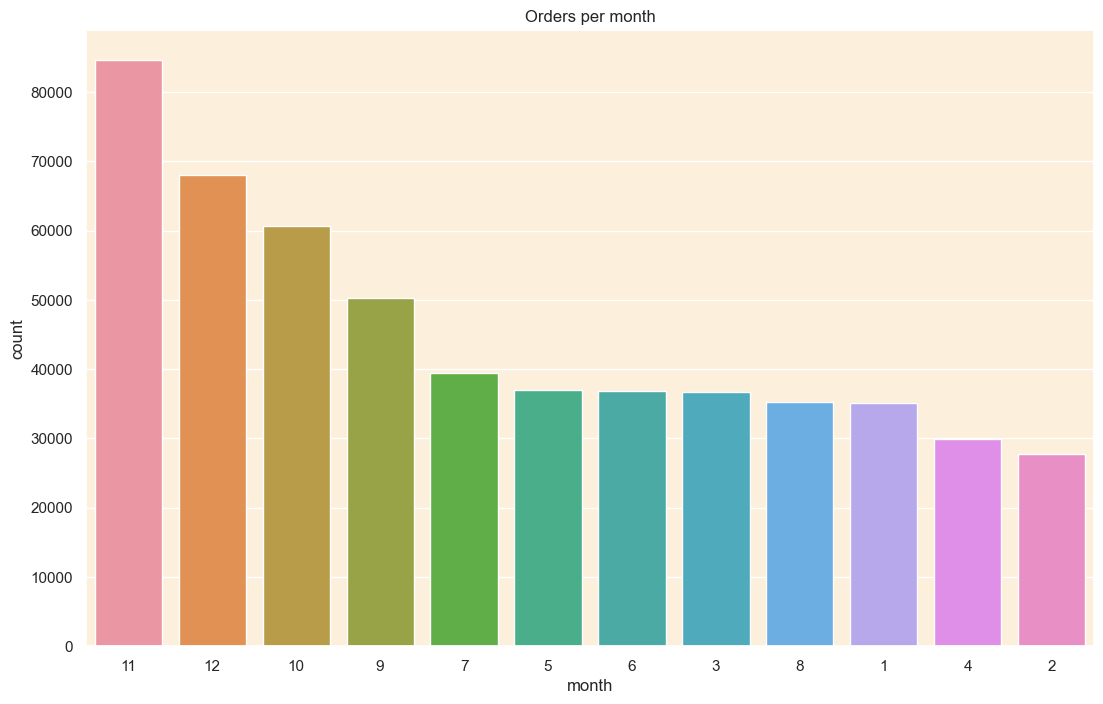

In [17]:
# Plot the number of orders per month of the year
plt.figure(figsize=(13,8))
plt.title('Orders per month')
sns.countplot(x='month', data=df, order = df['month'].value_counts().index)

Last 4 months of the years had the highest number of orders. This can be due to the holiday season.

## Analysis based on Hour

<Axes: title={'center': 'Hour'}, xlabel='hour', ylabel='count'>

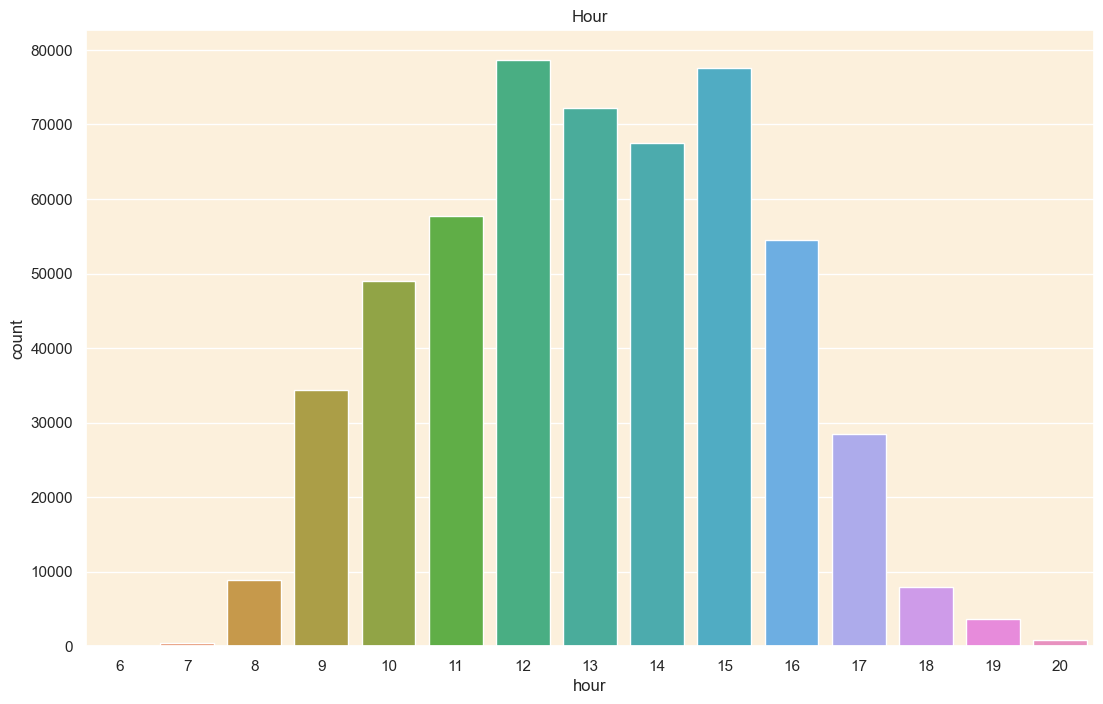

In [18]:
# Plot the hours of the day
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.countplot(x='hour', data=df)

The hours from 11am to 3pm are the busiest. No orders are taken from 9pm to 6 am

## Items Distribution

In [19]:
# Number of Items per Order
a = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
a.columns = ['Number of Items per Order']
a.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [20]:
# Number of Items per Customer
b = pd.DataFrame(df.groupby('CustomerID')['StockCode'].nunique())
b.columns = ['Number of Items per Customer']
b.head()

,Number of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


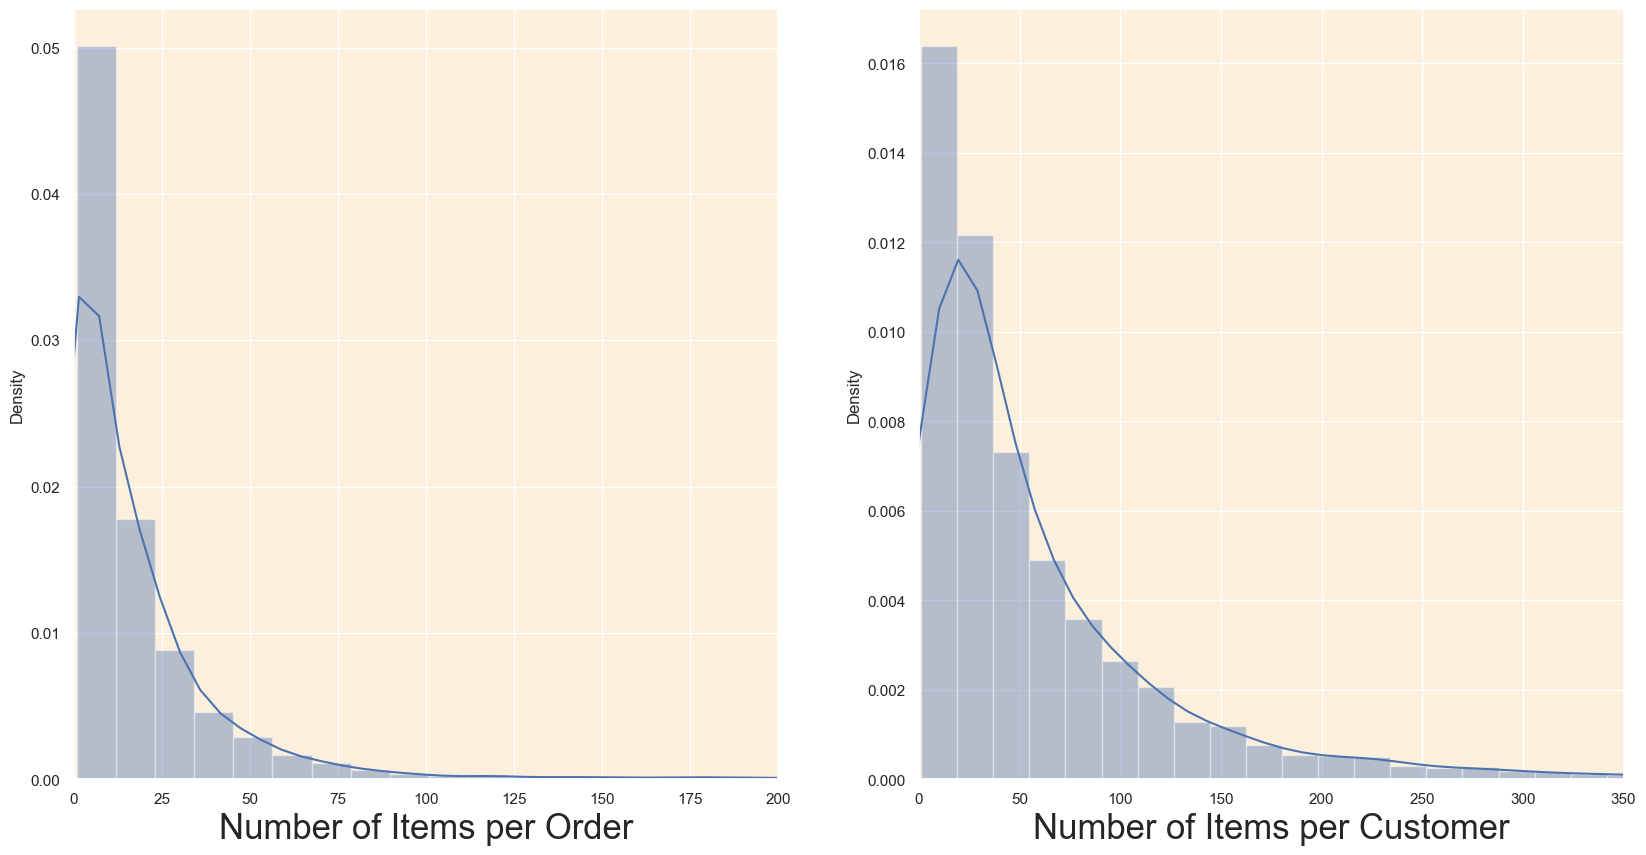

In [21]:
#Visualize the distribution of both
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(a['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(b['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

# Data Cleaning

## Missing Values

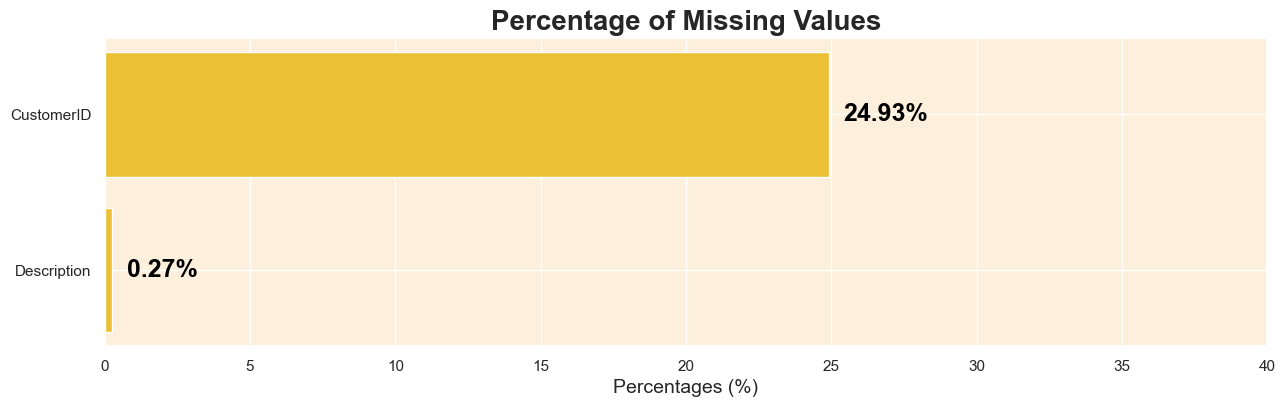

In [22]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ebc034')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=20)
plt.xlabel('Percentages (%)', fontsize=14)
plt.show()

In [23]:
# Extracting rows with missing values
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Day,year,month,hour
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00,Wednesday,2010,12,11
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,Wednesday,2010,12,14
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,Wednesday,2010,12,14
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40,Wednesday,2010,12,14
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32,Wednesday,2010,12,14


In [24]:
# Remove the rows with missing values
df = df.dropna(subset=['CustomerID', 'Description'])

In [25]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

## Duplicates Handling

In [26]:
# Find the duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the duplicated records
duplicate_rows_sorted.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Day,year,month,hour
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,Wednesday,2010,12,11
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,Wednesday,2010,12,11
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95,Wednesday,2010,12,11
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95,Wednesday,2010,12,11
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10,Wednesday,2010,12,11


In [27]:
# Display the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows.")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows.


In [28]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

## Fixing Cancelled Transactions

In [29]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice,TotalAmount,year,month,hour
count,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,-68.607920,2010.923242,7.306470,13.149459
std,1172.249902,445.190864,2022.869636,0.266223,3.511318,2.718147
min,-80995.000000,0.010000,-168469.600000,2010.000000,1.000000,6.000000
25%,-6.000000,1.450000,-17.000000,2011.000000,4.000000,11.000000
50%,-2.000000,2.950000,-8.500000,2011.000000,8.000000,13.000000
75%,-1.000000,4.950000,-3.300000,2011.000000,10.000000,15.000000
max,-1.000000,38970.000000,-0.120000,2011.000000,12.000000,20.000000


In [30]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


## Correcting Stockcode Anomalies

In [31]:
# Finding the number of unique stockcodes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


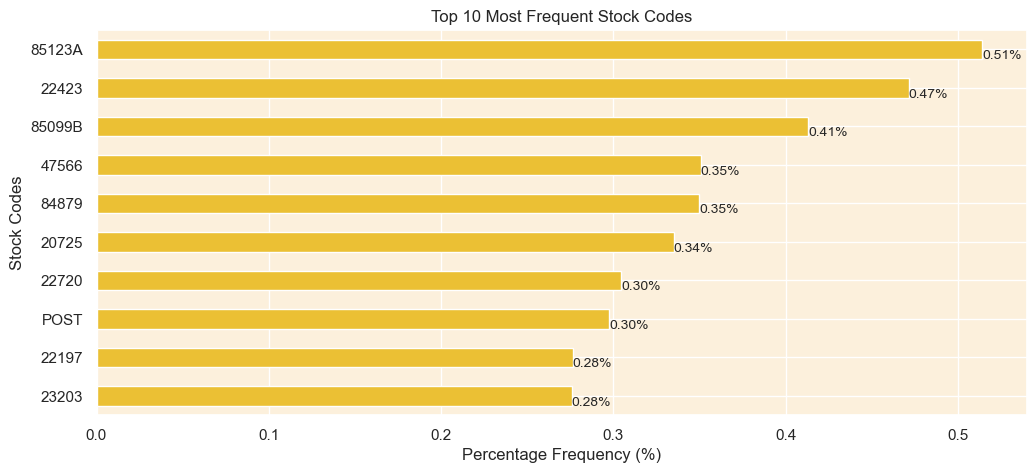

In [32]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ebc034')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [33]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
5    3676
0       7
1       1
dtype: int64


In [34]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [35]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [36]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [37]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

## Cleaning Description Column

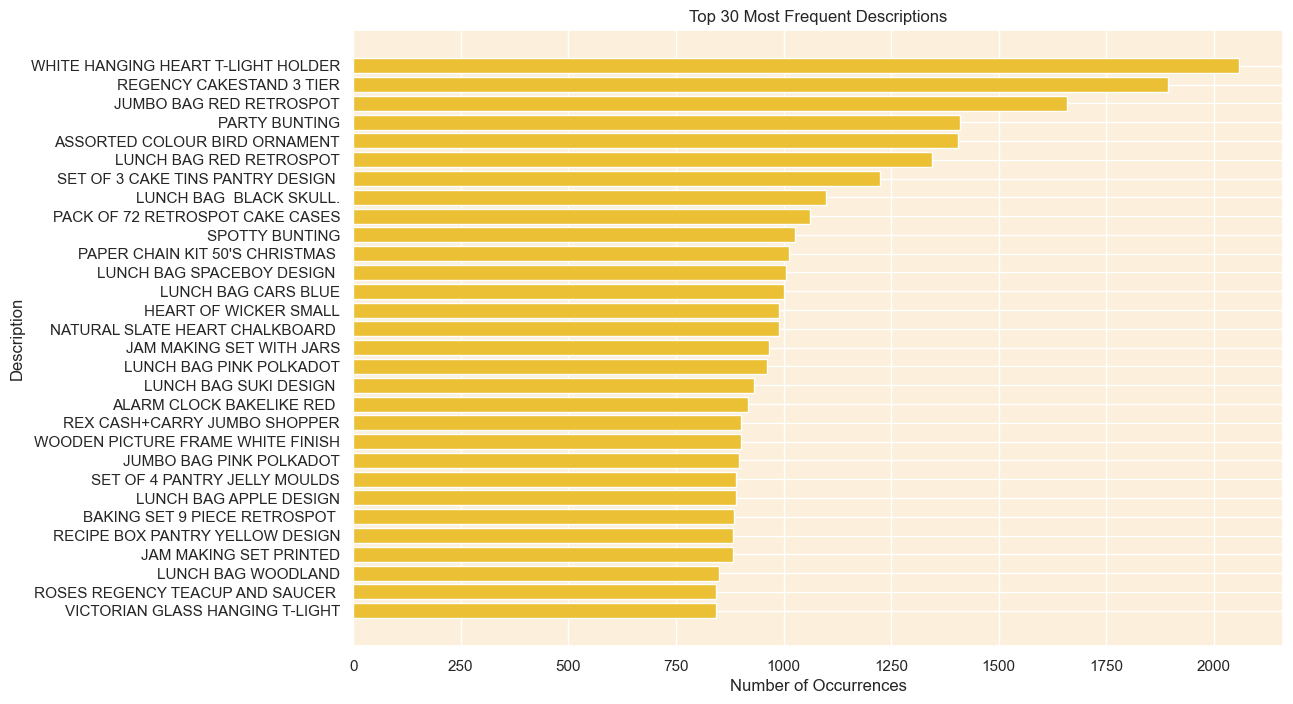

In [38]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ebc034')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

In [39]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [40]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [41]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

## Treating Zero Unit Prices

In [42]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [43]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [44]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

In [45]:
# Getting the number of rows in the dataframe
df.shape[0]

399573

## Outlier Treatment

In [46]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [47]:
# Getting the number of rows in the dataframe
df.shape[0]

399573

# Feature Engineering

We're going to use the RFM model. It is model that is used to identify a company's best customers by using certain measures. 

It stands for Recency, Frequency and Monetary value.

**Recency(R):** This metric reflects the recency of a customer's last purchase. A lower recency value suggests that the customer has bought something more recently, signaling greater engagement with the brand.

**Frequency(F):** This metric measures the number of times a customer purchases within a specified period. A higher frequency value denotes more frequent interactions with the business, which may imply greater loyalty or satisfaction.

**Monetary(M)**: This metric calculates the total spending of a customer over a specific period. A higher monetary value suggests that the customer has made more significant financial contributions to the business, reflecting their potential high lifetime value.

## Recency

In [48]:
referenceDate = df['InvoiceDate'].max()
referenceDate += datetime.timedelta(days = 1)

df['Recency'] = (referenceDate - df['InvoiceDate']).astype('timedelta64[D]')
new_df = df.groupby("CustomerID")['Recency'].min().reset_index()
new_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


## Frequency

In [49]:
dfCustomerFrequency = df[['CustomerID', 'TotalAmount']].groupby('CustomerID').count().reset_index()
dfCustomerFrequency.rename(columns={'TotalAmount': 'Frequency'}, inplace= True)
new_df = new_df.merge(dfCustomerFrequency, how="outer")
new_df.head()

,CustomerID,Recency,Frequency
0,12346.0,326.0,2
1,12347.0,2.0,182
2,12348.0,75.0,27
3,12349.0,19.0,72
4,12350.0,310.0,16


## Monetary

In [50]:
dfCustomerMV = df[['CustomerID', 'TotalAmount']].groupby('CustomerID').sum().reset_index()
dfCustomerMV.rename(columns={'TotalAmount': 'MonetaryValue'}, inplace= True)
new_df = new_df.merge(dfCustomerMV, how="outer")
#add a small number to monetary value to avoid problems with zeros as we transform to log scale
new_df["MonetaryValue"] = new_df["MonetaryValue"] + 0.001
new_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326.0,2,0.001
1,12347.0,2.0,182,4310.001
2,12348.0,75.0,27,1437.241
3,12349.0,19.0,72,1457.551
4,12350.0,310.0,16,294.401


# Feature Scaling

All features, including Recency, Frequency, and Monetary value, exhibit varying ranges, necessitating standardization. Specifically, the Monetary value feature can span a broad spectrum of values. To ensure that the inputs to our clustering algorithm are well-scaled and uniformly transformed, we will apply a logarithmic transformation to standardize these features.

In [51]:
new_df['log_Recency'] = np.log1p(new_df["Recency"])
new_df['log_Frequency'] = np.log1p(new_df["Frequency"])
new_df['log_MonetaryValue'] = np.log1p(new_df["MonetaryValue"])

# Preparing matrix for standard scaling transformation
X = new_df[["log_Recency", "log_Frequency", "log_MonetaryValue"]]

# Standardize the features (mean 0 and std. dev 1)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [52]:
X_scaled

array([[ 1.45503609, -2.09855912, -5.03848057],
       [-1.97583321,  1.17618827,  1.41296709],
       [ 0.38787658, -0.31926583,  0.56663167],
       ...,
       [-1.17239776, -0.87143113, -1.0459644 ],
       [-1.602257  ,  2.26735153,  0.83632873],
       [-0.01182092,  0.42195657,  0.75583628]])

In [53]:
new_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,log_Recency,log_Frequency,log_MonetaryValue
0,12346.0,326.0,2,0.001,5.789960,1.098612,0.001000
1,12347.0,2.0,182,4310.001,1.098612,5.209486,8.368925
2,12348.0,75.0,27,1437.241,4.330733,3.332205,7.271176
3,12349.0,19.0,72,1457.551,2.995732,4.290459,7.285199
4,12350.0,310.0,16,294.401,5.739793,2.833213,5.688334


<Axes: xlabel='log_Recency', ylabel='Density'>

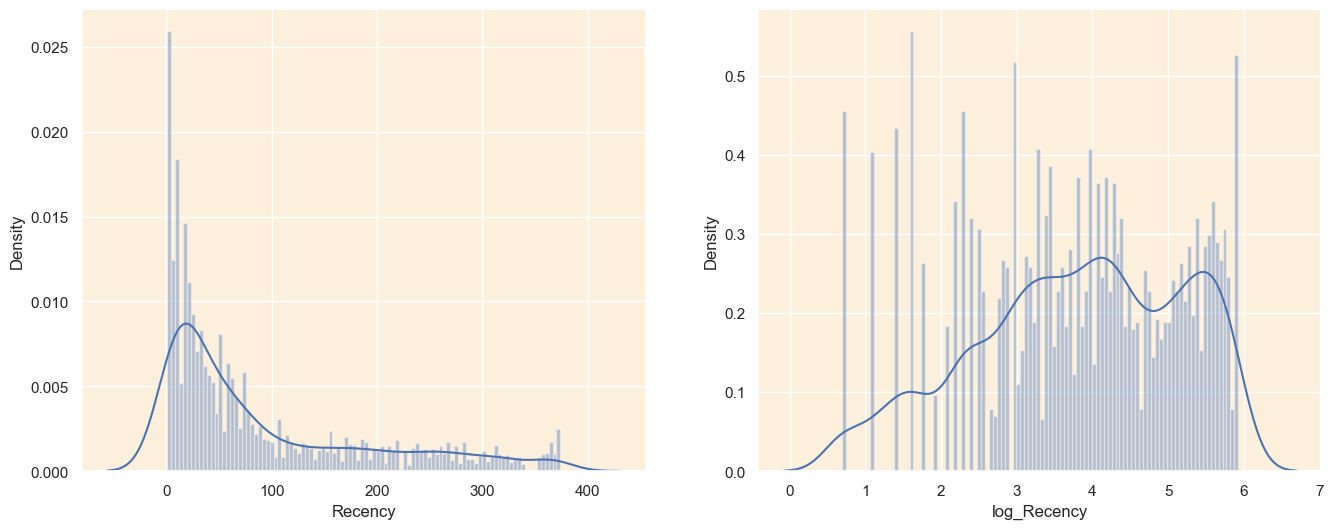

In [54]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.distplot(new_df['Recency'] , bins=100 , ax=axes[0])
sns.distplot(new_df['log_Recency'] ,bins=100 ,  ax=axes[1])

<Axes: xlabel='log_Frequency', ylabel='Density'>

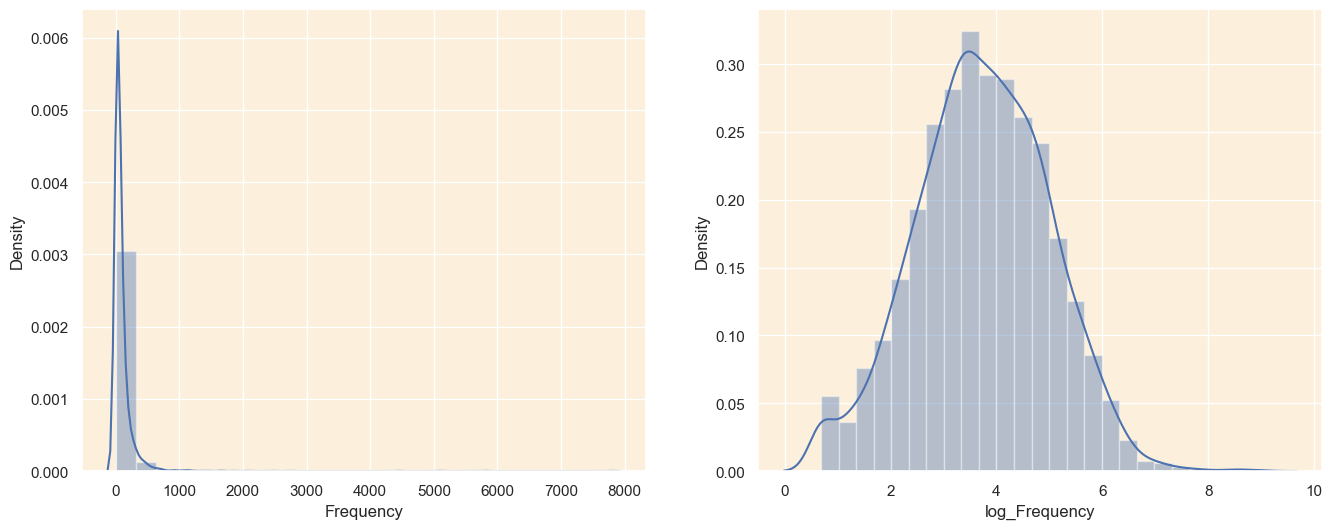

In [55]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.distplot(new_df['Frequency'] , bins=25 , ax=axes[0])
sns.distplot(new_df['log_Frequency'] ,bins=25 ,  ax=axes[1])


<Axes: xlabel='log_MonetaryValue', ylabel='Density'>

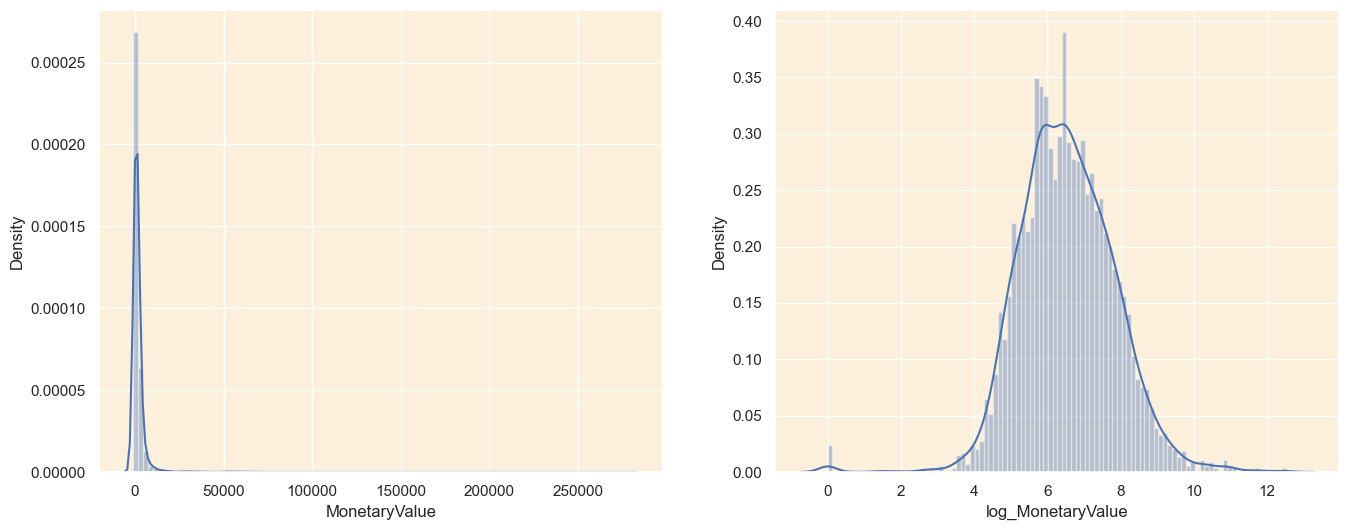

In [56]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.distplot(new_df['MonetaryValue'] , bins=100 , ax=axes[0])
sns.distplot(new_df['log_MonetaryValue'] ,bins=100 ,  ax=axes[1])

Text(0.5, 0, 'MonetaryValue')

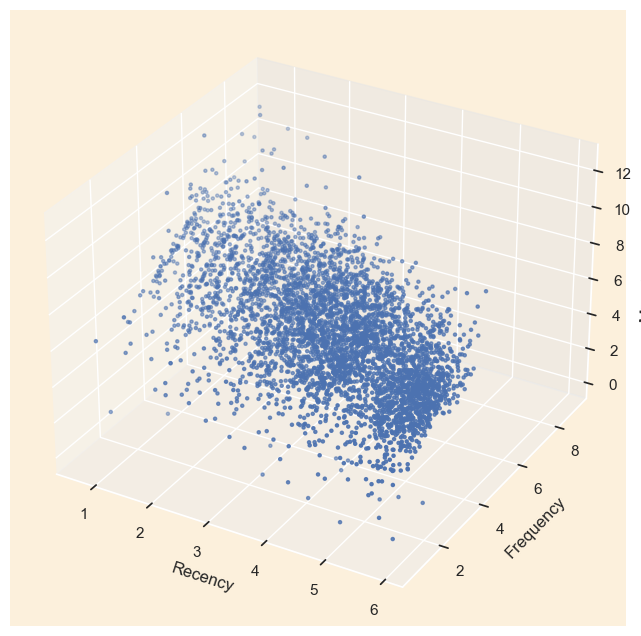

In [57]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs =new_df.log_Recency
ys = new_df.log_Frequency
zs = new_df.log_MonetaryValue
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

In [58]:
log_new_df = pd.DataFrame({
    'log_Recency': new_df['log_Recency'],
    'log_Frequency': new_df['log_Frequency'],
    'log_MonetaryValue': new_df['log_MonetaryValue']
})

In [59]:

log_new_df.head()

,log_Recency,log_Frequency,log_MonetaryValue
0,5.789960,1.098612,0.001000
1,1.098612,5.209486,8.368925
2,4.330733,3.332205,7.271176
3,2.995732,4.290459,7.285199
4,5.739793,2.833213,5.688334


array([[<Axes: xlabel='log_Recency', ylabel='log_Recency'>,
        <Axes: xlabel='log_Frequency', ylabel='log_Recency'>,
        <Axes: xlabel='log_MonetaryValue', ylabel='log_Recency'>],
       [<Axes: xlabel='log_Recency', ylabel='log_Frequency'>,
        <Axes: xlabel='log_Frequency', ylabel='log_Frequency'>,
        <Axes: xlabel='log_MonetaryValue', ylabel='log_Frequency'>],
       [<Axes: xlabel='log_Recency', ylabel='log_MonetaryValue'>,
        <Axes: xlabel='log_Frequency', ylabel='log_MonetaryValue'>,
        <Axes: xlabel='log_MonetaryValue', ylabel='log_MonetaryValue'>]],
      dtype=object)

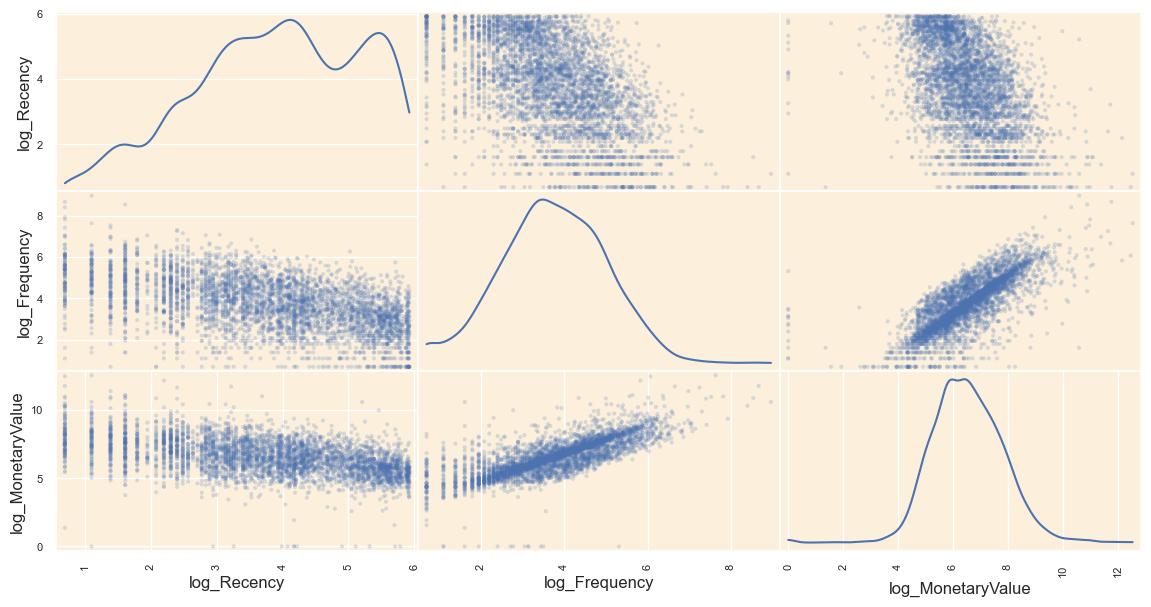

In [60]:

scatter_matrix(log_new_df, alpha = 0.2, figsize = (14,7), diagonal = 'kde')

In [61]:
log_new_df.corr()

,log_Recency,log_Frequency,log_MonetaryValue
log_Recency,1.000000,-0.502189,-0.476036
log_Frequency,-0.502189,1.000000,0.761119
log_MonetaryValue,-0.476036,0.761119,1.000000


<Axes: >

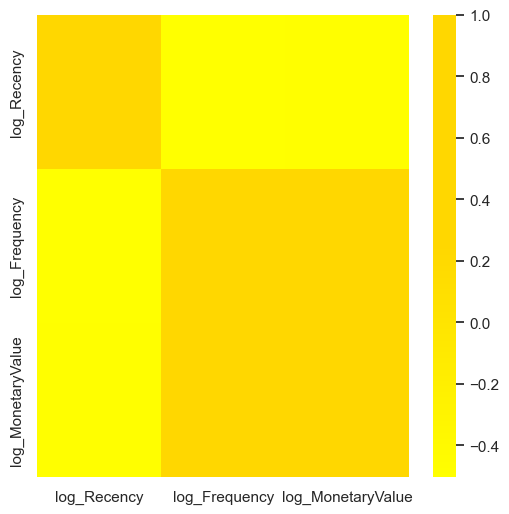

In [62]:
fig = plt.figure(figsize=(6, 6))
colors = ["yellow", "gold", "#FFD700"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gold", colors, N=256)
sns.heatmap(log_new_df.corr(),cmap=custom_cmap)

# K-Means Clustering Implementation

Clustering is an unsupervised learning technique used to identify groups or classes within data. We employ the K-means clustering algorithm to ascertain the optimal customer segments.

In K-means, we must specify kk, the number of clusters, although initially determining the appropriate number of clusters isn't straightforward. To address this, we experiment with various numbers of clusters and assess them using their silhouette coefficients.

The silhouette score helps gauge the effectiveness of clustering algorithms like K-Means, by measuring how well each sample is grouped with other similar samples within its cluster. The silhouette coefficient, which ranges from -1 (indicating dissimilarity) to 1 (indicating similarity), is calculated for each sample across the different clusters.

In [63]:
print(log_new_df.isnull().sum())

log_Recency           0
log_Frequency         0
log_MonetaryValue    30
dtype: int64


In [64]:
log_new_df = log_new_df.fillna(log_new_df.median())
print(log_new_df.isnull().sum())

log_Recency          0
log_Frequency        0
log_MonetaryValue    0
dtype: int64


In [65]:
matrix = log_new_df.to_numpy() 
imputer = SimpleImputer(strategy='median')
matrix_imputed = imputer.fit_transform(matrix)

for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3978619371640905
For n_clusters = 3 The average silhouette_score is : 0.3018264321436096
For n_clusters = 4 The average silhouette_score is : 0.31167856945435596
For n_clusters = 5 The average silhouette_score is : 0.2756607648391281
For n_clusters = 6 The average silhouette_score is : 0.2746744561120187
For n_clusters = 7 The average silhouette_score is : 0.2634547865399003
For n_clusters = 8 The average silhouette_score is : 0.2603191965537153
For n_clusters = 9 The average silhouette_score is : 0.2632560244693229


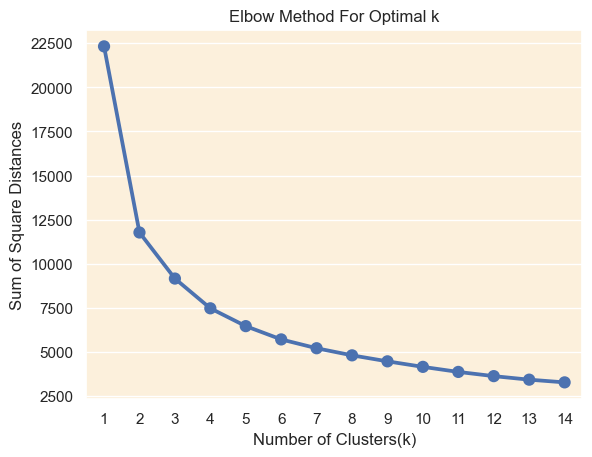

In [66]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(log_new_df)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**When cluster = 2**

In [67]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('Silhouette Score: {:<.3f}'.format(silhouette_avg))

Silhouette Score: 0.398


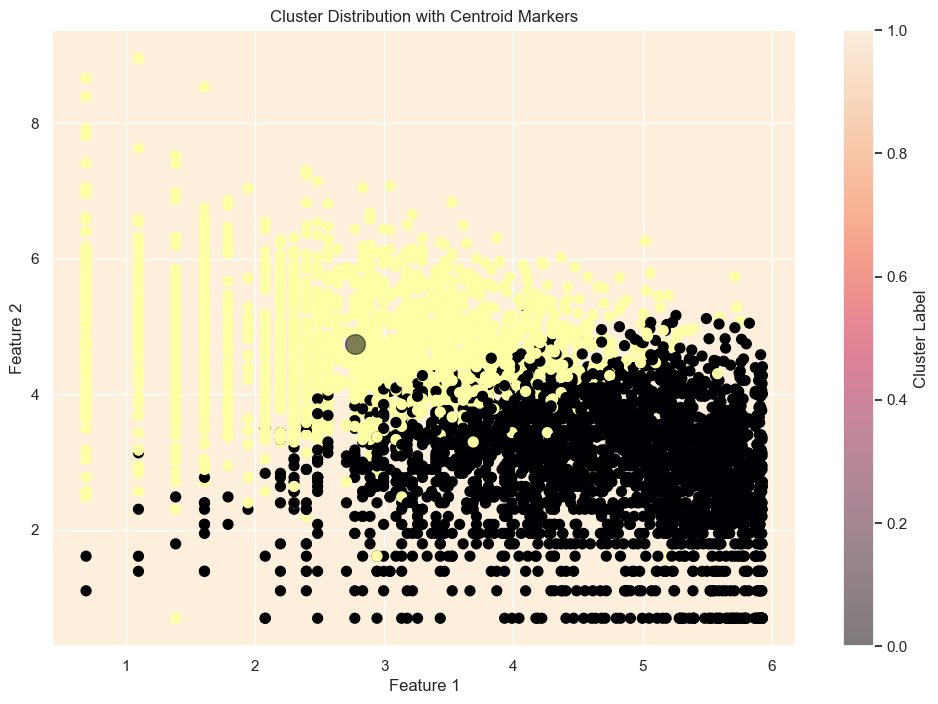

In [68]:
#create a scatter plot
plt.figure(figsize=(12,8))
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='inferno')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Cluster Distribution with Centroid Markers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  # Show color scale

plt.show()

In [69]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(log_new_df)

#Find the clusters for the observation given in the dataset
new_df['Cluster'] = KMean_clust.labels_
new_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,log_Recency,log_Frequency,log_MonetaryValue,Cluster
0,12346.0,326.0,2,0.001,5.789960,1.098612,0.001000,1
1,12347.0,2.0,182,4310.001,1.098612,5.209486,8.368925,0
2,12348.0,75.0,27,1437.241,4.330733,3.332205,7.271176,1
3,12349.0,19.0,72,1457.551,2.995732,4.290459,7.285199,0
4,12350.0,310.0,16,294.401,5.739793,2.833213,5.688334,1
5,12352.0,36.0,84,1265.411,3.610918,4.442651,7.143942,0
6,12353.0,204.0,4,89.001,5.323010,1.609438,4.499821,1
7,12354.0,232.0,58,1079.401,5.451038,4.077537,6.985088,1
8,12355.0,214.0,13,459.401,5.370638,2.639057,6.132098,1
9,12356.0,23.0,58,2487.431,3.178054,4.077537,7.819408,0


**When cluster = 4**

In [70]:
n_clusters = 4
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers_4 = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('Silhouette Score: {:<.3f}'.format(silhouette_avg))

Silhouette Score: 0.398


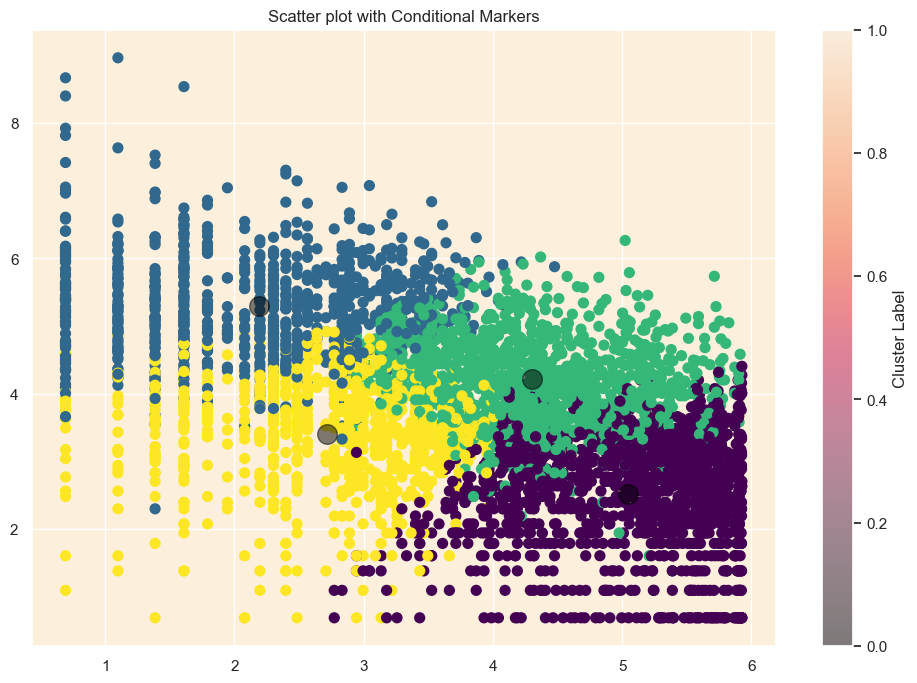

In [71]:
plt.figure(figsize=(12,8))

plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers_4, s=50, cmap='viridis', marker='o', alpha=1)
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.colorbar(label='Cluster Label')
plt.title('Scatter plot with Conditional Markers')
plt.show()

In [72]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(log_new_df)

#Find the clusters for the observation given in the dataset
new_df['Cluster'] = KMean_clust.labels_
new_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,log_Recency,log_Frequency,log_MonetaryValue,Cluster
0,12346.0,326.0,2,0.001,5.789960,1.098612,0.001000,2
1,12347.0,2.0,182,4310.001,1.098612,5.209486,8.368925,3
2,12348.0,75.0,27,1437.241,4.330733,3.332205,7.271176,0
3,12349.0,19.0,72,1457.551,2.995732,4.290459,7.285199,0
4,12350.0,310.0,16,294.401,5.739793,2.833213,5.688334,2
5,12352.0,36.0,84,1265.411,3.610918,4.442651,7.143942,0
6,12353.0,204.0,4,89.001,5.323010,1.609438,4.499821,2
7,12354.0,232.0,58,1079.401,5.451038,4.077537,6.985088,0
8,12355.0,214.0,13,459.401,5.370638,2.639057,6.132098,2
9,12356.0,23.0,58,2487.431,3.178054,4.077537,7.819408,0
